# PROYECTO 04

## JAVIER CRUZ

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [1]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('ggplot')
sns.set(style="whitegrid")

In [5]:
# leer conjuntos de datos en los DataFrames
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
#products = pd.read_csv('/datasets/products.csv', sep=';', names=['product_id', 'product_name', 'aisle_id', 'department_id'])
products = pd.read_csv('/datasets/products.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
departments = pd.read_csv('/datasets/departments.csv', sep=';')
#order_products = pd.read_csv('/datasets/order_products.csv', sep=';', names=['order_id', 'product_id', 'add_to_cart_order', 'reordered'])
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

In [7]:
# mostrar información del DataFrame
print("Información del DataFrame orders:")
print(orders.info(show_counts=True))
print("\nPrimeras filas del DataFrame orders:")
print(orders.head())

Información del DataFrame orders:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB
None

Primeras filas del DataFrame orders:
   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0             

In [8]:
# mostrar información del DataFrame
print("\nInformación del DataFrame products:")
print(products.info(show_counts=True))
print("\nPrimeras filas del DataFrame products:")
print(products.head())


Información del DataFrame products:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None

Primeras filas del DataFrame products:
   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             

In [9]:
# mostrar información del DataFrame
print("\nInformación del DataFrame aisles:")
print(aisles.info(show_counts=True))
print("\nPrimeras filas del DataFrame aisles:")
print(aisles.head())


Información del DataFrame aisles:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB
None

Primeras filas del DataFrame aisles:
   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


In [10]:
# mostrar información del DataFrame
print("\nInformación del DataFrame departments:")
print(departments.info(show_counts=True))
print("\nPrimeras filas del DataFrame departments:")
print(departments.head())


Información del DataFrame departments:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes
None

Primeras filas del DataFrame departments:
   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


In [11]:
# mostrar información del DataFrame
print("\nInformación del DataFrame order_products:")
print(order_products.info(show_counts=True))
print("\nPrimeras filas del DataFrame order_products:")
print(order_products.head())


Información del DataFrame order_products:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB
None

Primeras filas del DataFrame order_products:
   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.


#respuesta: el Paso 1 ha permitido cargar y observar la estructura básica de los datos, identificando algunos problemas como valores faltantes y posibles errores en las rutas de los archivos. Esto sienta las bases para realizar un análisis más profundo y preparar los datos para su uso en análisis posteriores.

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

In [12]:
orders['order_id'] = orders['order_id'].astype(int)
orders['user_id'] = orders['user_id'].astype(int)
orders['order_number'] = orders['order_number'].astype(int)
orders['order_dow'] = orders['order_dow'].astype(int)
orders['order_hour_of_day'] = orders['order_hour_of_day'].astype(int)

# Verificar valores ausentes
print("\nValores ausentes en orders:")
print(orders.isnull().sum())

print("\nValores ausentes en products:")
print(products.isnull().sum())

print("\nValores ausentes en aisles:")
print(aisles.isnull().sum())

print("\nValores ausentes en departments:")
print(departments.isnull().sum())

print("\nValores ausentes en order_products:")
print(order_products.isnull().sum())


Valores ausentes en orders:
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64

Valores ausentes en products:
product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

Valores ausentes en aisles:
aisle_id    0
aisle       0
dtype: int64

Valores ausentes en departments:
department_id    0
department       0
dtype: int64

Valores ausentes en order_products:
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

Plan de solución:
*-Verificar y corregir los tipos de datos (por ejemplo, asegurarse de que las columnas de ID sean enteros).
*Identificar y completar valores ausentes.
*Identificar y eliminar valores duplicados.
*Documentar los hallazgos y las decisiones tomadas.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [13]:
# Revisa si hay pedidos duplicados
print("¿Tienes líneas duplicadas en 'orders'?")
duplicated_orders = orders.duplicated()
print(f"Número de filas duplicadas: {duplicated_orders.sum()}")


¿Tienes líneas duplicadas en 'orders'?
Número de filas duplicadas: 15


¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

In [14]:
if duplicated_orders.sum() > 0:
    print("\nEjemplo de filas duplicadas:")
    print(orders[duplicated_orders].head())


Ejemplo de filas duplicadas:
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   

        days_since_prior_order  
145574                     2.0  
223105                    30.0  
230807                    16.0  
266232                     NaN  
273805                     6.0  


In [15]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
if 'order_dow' in orders.columns and 'order_hour_of_day' in orders.columns:
    wednesday_2am_orders = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]
    print("\nPedidos realizados el miércoles a las 2:00 a.m.:")
    print(wednesday_2am_orders)
else:
    print("Las columnas 'order_dow' y/o 'order_hour_of_day' no existen en el DataFrame.")


Pedidos realizados el miércoles a las 2:00 a.m.:
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156   

¿Qué sugiere este resultado?

#respuesta: Las columnas 'order_dow' y/o 'order_hour_of_day' no existen en el DataFrame.

In [16]:
# Elimina los pedidos duplicados
orders.drop_duplicates(inplace=True)

In [17]:
# Vuelve a verificar si hay filas duplicadas
print("\n¿Hay filas duplicadas después de eliminarlas?")
print(f"Número de filas duplicadas: {orders.duplicated().sum()}")


¿Hay filas duplicadas después de eliminarlas?
Número de filas duplicadas: 0


In [18]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print("\n¿Hay IDs de productos duplicados?")
duplicated_product_ids = products['product_id'].duplicated().sum()
print(f"Número de IDs de productos duplicados: {duplicated_product_ids}")


¿Hay IDs de productos duplicados?
Número de IDs de productos duplicados: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos

#Respuesta: 
*Duplicados: Se revisaron todos los DataFrames (orders, products, aisles, departments, order_products) en busca de duplicados. Si se encontraron, se eliminaron utilizando drop_duplicates().
*IDs duplicados: Se verificaron específicamente los IDs únicos en cada DataFrame para asegurarse de que no hubiera duplicados en las claves principales.
*Hallazgos específicos:
  -En algunos casos, se encontraron duplicados en las filas completas, lo que sugiere datos redundantes.
  -Los IDs duplicados podrían indicar problemas en la integridad de los datos, como errores en la entrada o en la generación de los datos.
*Acciones tomadas: Se eliminaron todas las filas duplicadas y se verificó nuevamente para garantizar que los datos estuvieran limpios.

### `products` data frame

In [19]:
# Verifica si hay filas totalmente duplicadas
print("¿Hay filas totalmente duplicadas en 'products'?")
duplicated_rows = products.duplicated()
print(f"Número de filas duplicadas: {duplicated_rows.sum()}")

if duplicated_rows.sum() > 0:
    print("\nEjemplo de filas duplicadas:")
    print(products[duplicated_rows].head())

¿Hay filas totalmente duplicadas en 'products'?
Número de filas duplicadas: 0


In [20]:
# Revisa únicamente si hay ID de departamentos duplicados
print("\n¿Hay IDs de departamentos duplicados en 'products'?")
duplicated_department_ids = products['department_id'].duplicated().sum()
print(f"Número de IDs de departamentos duplicados: {duplicated_department_ids}")


¿Hay IDs de departamentos duplicados en 'products'?
Número de IDs de departamentos duplicados: 49673


In [21]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
print("\n¿Hay nombres de productos duplicados (ignorando mayúsculas/minúsculas)?")
duplicated_product_names = products['product_name'].str.upper().duplicated().sum()
print(f"Número de nombres de productos duplicados: {duplicated_product_names}")

if duplicated_product_names > 0:
    print("\nEjemplo de nombres de productos duplicados:")
    duplicated_names = products[products['product_name'].str.upper().duplicated(keep=False)]
    print(duplicated_names.sort_values('product_name').head())


¿Hay nombres de productos duplicados (ignorando mayúsculas/minúsculas)?
Número de nombres de productos duplicados: 1361

Ejemplo de nombres de productos duplicados:
       product_id                               product_name  aisle_id  \
31844       31845  18-In-1 Hemp Peppermint Pure-Castile Soap        25   
23339       23340  18-in-1 Hemp Peppermint Pure-Castile Soap        25   
19941       19942            Aged Balsamic Vinegar Of Modena        19   
13152       13153            Aged Balsamic Vinegar of Modena        19   
22582       22583         Albacore Solid White Tuna In Water        95   

       department_id  
31844             11  
23339             11  
19941             13  
13152             13  
22582             15  


In [22]:
# Revisa si hay nombres duplicados de productos no faltantes
print("\n¿Hay nombres duplicados de productos no faltantes?")
non_missing_names = products[products['product_name'].notnull()]
duplicated_non_missing_names = non_missing_names['product_name'].str.upper().duplicated().sum()
print(f"Número de nombres duplicados de productos no faltantes: {duplicated_non_missing_names}")

if duplicated_non_missing_names > 0:
    print("\nEjemplo de nombres duplicados de productos no faltantes:")
    duplicated_non_missing = non_missing_names[non_missing_names['product_name'].str.upper().duplicated(keep=False)]
    print(duplicated_non_missing.sort_values('product_name').head())


¿Hay nombres duplicados de productos no faltantes?
Número de nombres duplicados de productos no faltantes: 104

Ejemplo de nombres duplicados de productos no faltantes:
       product_id                               product_name  aisle_id  \
31844       31845  18-In-1 Hemp Peppermint Pure-Castile Soap        25   
23339       23340  18-in-1 Hemp Peppermint Pure-Castile Soap        25   
19941       19942            Aged Balsamic Vinegar Of Modena        19   
13152       13153            Aged Balsamic Vinegar of Modena        19   
22582       22583         Albacore Solid White Tuna In Water        95   

       department_id  
31844             11  
23339             11  
19941             13  
13152             13  
22582             15  


Describe brevemente tus hallazgos y lo que hiciste con ellos.

#respuesta:  
Conclusiones y acciones tomadas.
*Filas duplicadas:
   -Si se encuentran filas completamente duplicadas, esto podría ser un error en los datos. Estas filas serán eliminadas para evitar redundancia.
*IDs de departamentos duplicados:
   -Si hay duplicados en los IDs de departamentos, esto podría ser un problema en la asignación de productos a departamentos. Se investigará si los productos asociados a estos IDs son diferentes o si hay un error en los datos.
*Nombres de productos duplicados:
    -Si se encuentran nombres duplicados, esto podría indicar productos similares o errores en los datos. Se analizarán los duplicados para determinar si deben ser corregidos o eliminados.
*Nombres duplicados de productos no faltantes:
   -Si hay duplicados en los nombres de productos no faltantes, se investigará si representan productos diferentes o si son errores en los datos.
   -En general, cualquier duplicado encontrado será eliminado o corregido según corresponda, asegurando que los datos sean consistentes y limpios para su análisis posterior. Si necesitas que ejecute acciones específicas basadas en los resultados, házmelo saber.

### `departments` data frame

In [23]:
# Revisa si hay filas totalmente duplicadas
print("¿Hay filas totalmente duplicadas en 'departments'?")
duplicated_rows_departments = departments.duplicated()
print(f"Número de filas duplicadas: {duplicated_rows_departments.sum()}")

if duplicated_rows_departments.sum() > 0:
    print("\nEjemplo de filas duplicadas:")
    print(departments[duplicated_rows_departments].head())

¿Hay filas totalmente duplicadas en 'departments'?
Número de filas duplicadas: 0


In [24]:
# Revisa únicamente si hay IDs duplicadas de productos
print("\n¿Hay IDs duplicados en 'department_id'?")
duplicated_department_ids = departments['department_id'].duplicated().sum()
print(f"Número de IDs duplicados: {duplicated_department_ids}")

if duplicated_department_ids > 0:
    print("\nEjemplo de IDs duplicados:")
    print(departments[departments['department_id'].duplicated(keep=False)].sort_values('department_id'))


¿Hay IDs duplicados en 'department_id'?
Número de IDs duplicados: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

#respuesta:
*Filas duplicadas:
No se encontraron filas completamente duplicadas en el DataFrame departments. Esto indica que los datos están bien estructurados y no contienen redundancias.
*IDs duplicados:
No se encontraron duplicados en los department_id. Esto confirma que los identificadores de los departamentos son únicos y no hay problemas de integridad en esta columna.
*Acciones tomadas:
No fue necesario realizar ninguna acción correctiva, ya que los datos del DataFrame departments están limpios y no presentan duplicados.
En resumen, el DataFrame departments no tiene problemas de duplicados, y los datos están listos para ser utilizados en análisis posteriores. Si necesitas realizar alguna otra verificación o análisis, házmelo saber.

### `aisles` data frame

In [25]:
# Revisa si hay filas totalmente duplicadas
print("¿Hay filas totalmente duplicadas en 'aisles'?")
duplicated_rows_aisles = aisles.duplicated()
print(f"Número de filas duplicadas: {duplicated_rows_aisles.sum()}")

if duplicated_rows_aisles.sum() > 0:
    print("\nEjemplo de filas duplicadas:")
    print(aisles[duplicated_rows_aisles].head())

¿Hay filas totalmente duplicadas en 'aisles'?
Número de filas duplicadas: 0


In [26]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print("\n¿Hay IDs duplicados en 'aisle_id'?")
duplicated_aisle_ids = aisles['aisle_id'].duplicated().sum()
print(f"Número de IDs duplicados: {duplicated_aisle_ids}")

if duplicated_aisle_ids > 0:
    print("\nEjemplo de IDs duplicados:")
    print(aisles[aisles['aisle_id'].duplicated(keep=False)].sort_values('aisle_id'))


¿Hay IDs duplicados en 'aisle_id'?
Número de IDs duplicados: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

#Respuesta: 
el DataFrame aisles no tiene problemas de duplicados.

### `order_products` data frame

In [27]:
# Revisa si hay filas totalmente duplicadas
print("¿Hay filas totalmente duplicadas en 'order_products'?")
duplicated_rows_order_products = order_products.duplicated()
print(f"Número de filas duplicadas: {duplicated_rows_order_products.sum()}")

if duplicated_rows_order_products.sum() > 0:
    print("\nEjemplo de filas duplicadas:")
    print(order_products[duplicated_rows_order_products].head())


¿Hay filas totalmente duplicadas en 'order_products'?
Número de filas duplicadas: 0


In [28]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print("\n¿Hay filas duplicadas después de eliminarlas?")
print(f"Número de filas duplicadas: {order_products.duplicated().sum()}")


¿Hay filas duplicadas después de eliminarlas?
Número de filas duplicadas: 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

#Respuesta: Se eliminaron todas las filas duplicadas y se verificó nuevamente para garantizar que los datos estuvieran limpios.

### `products` data frame

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

In [29]:
# Encuentra los valores ausentes en la columna 'product_name'
missing_product_names = products[products['product_name'].isnull()]
print(f"Número de valores ausentes en 'product_name': {missing_product_names.shape[0]}")
print("\nEjemplo de filas con valores ausentes en 'product_name':")
print(missing_product_names.head())

Número de valores ausentes en 'product_name': 1258

Ejemplo de filas con valores ausentes en 'product_name':
     product_id product_name  aisle_id  department_id
37           38          NaN       100             21
71           72          NaN       100             21
109         110          NaN       100             21
296         297          NaN       100             21
416         417          NaN       100             21


Describe brevemente cuáles son tus hallazgos.

#Respuesta:
Hay valores ausentes en la columna product_name de la tabla products.
Según los datos proporcionados, los valores ausentes están representados por filas donde product_name está vacío o nulo.

In [30]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
missing_aisle_100 = missing_product_names[missing_product_names['aisle_id'] == 100]
print(f"Número de valores ausentes relacionados con el pasillo con ID 100: {missing_aisle_100.shape[0]}")


Número de valores ausentes relacionados con el pasillo con ID 100: 1258


Describe brevemente cuáles son tus hallazgos.

#Respuesta: Todos los productos con nombres ausentes parecen estar relacionados con el pasillo con ID 100.

In [31]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
missing_department_21 = missing_product_names[missing_product_names['department_id'] == 21]
print(f"Número de valores ausentes relacionados con el departamento con ID 21: {missing_department_21.shape[0]}")


Número de valores ausentes relacionados con el departamento con ID 21: 1258


Describe brevemente cuáles son tus hallazgos.

#respuesta: Todos los productos con nombres ausentes también están relacionados con el departamento con ID 21.

In [32]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
aisle_100 = aisles[aisles['aisle_id'] == 100]
print("\nInformación del pasillo con ID 100:")
print(aisle_100)

# Revisar información del departamento con ID 21
department_21 = departments[departments['department_id'] == 21]
print("\nInformación del departamento con ID 21:")
print(department_21)


Información del pasillo con ID 100:
    aisle_id    aisle
99       100  missing

Información del departamento con ID 21:
    department_id department
20             21    missing


Describe brevemente cuáles son tus hallazgos.

#respuesta: 
*El pasillo con ID 100 está etiquetado como missing en la tabla aisles.
*El departamento con ID 21 también está etiquetado como missing en la tabla departments.
*Esto sugiere que los valores ausentes en product_name están relacionados con datos faltantes o no categorizados en los pasillos y departamentos.

In [33]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'].fillna('Unknown', inplace=True)

# Verificar si quedan valores ausentes
remaining_missing = products['product_name'].isnull().sum()
print(f"Número de valores ausentes restantes en 'product_name': {remaining_missing}")

Número de valores ausentes restantes en 'product_name': 0


Describe brevemente tus hallazgos y lo que hiciste con ellos.

#Respuesta:
*Los valores ausentes en product_name fueron completados con 'Unknown'.
*Después de esta acción, no quedan valores ausentes en la columna product_name.

### `orders` data frame

In [34]:
# Encuentra los valores ausentes
missing_values_orders = orders.isnull().sum()
print("Valores ausentes en cada columna de 'orders':")
print(missing_values_orders)

Valores ausentes en cada columna de 'orders':
order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [35]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print("\nBasic statistics of the orders dataframe:")
print(orders.describe())


Basic statistics of the orders dataframe:
           order_id        user_id   order_number      order_dow  \
count  4.789520e+05  478952.000000  478952.000000  478952.000000   
mean   1.709953e+06  102966.654911      17.157563       2.775051   
std    9.869537e+05   59525.292863      17.704457       2.045901   
min    4.000000e+00       2.000000       1.000000       0.000000   
25%    8.564698e+05   51413.750000       5.000000       1.000000   
50%    1.709521e+06  102633.000000      11.000000       3.000000   
75%    2.563002e+06  154419.000000      23.000000       5.000000   
max    3.421079e+06  206209.000000     100.000000       6.000000   

       order_hour_of_day  days_since_prior_order  
count      478952.000000           450135.000000  
mean           13.447034               11.101814  
std             4.224567                9.190004  
min             0.000000                0.000000  
25%            10.000000                4.000000  
50%            13.000000              

Describe brevemente tus hallazgos y lo que hiciste con ellos.

#respuesta: 
*La columna add_to_cart_order tiene valores ausentes.
*El valor mínimo en add_to_cart_order es 1.
*El valor máximo en add_to_cart_order depende del número máximo de productos en un pedido.

### `order_products` data frame

In [36]:
# Encuentra los valores ausentes
missing_values_order_products = order_products.isnull().sum()
print("Valores ausentes en cada columna de 'order_products':")
print(missing_values_order_products)

Valores ausentes en cada columna de 'order_products':
order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [37]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print("\n2. Valores mínimos y máximos:")
print(order_products.describe())


2. Valores mínimos y máximos:
           order_id    product_id  add_to_cart_order     reordered
count  4.545007e+06  4.545007e+06       4.544171e+06  4.545007e+06
mean   1.711166e+06  2.558084e+04       8.351669e+00  5.905025e-01
std    9.850955e+05  1.409552e+04       7.080368e+00  4.917411e-01
min    4.000000e+00  1.000000e+00       1.000000e+00  0.000000e+00
25%    8.608170e+05  1.353500e+04       3.000000e+00  0.000000e+00
50%    1.711530e+06  2.527200e+04       6.000000e+00  1.000000e+00
75%    2.561311e+06  3.793500e+04       1.100000e+01  1.000000e+00
max    3.421079e+06  4.969400e+04       6.400000e+01  1.000000e+00


Describe brevemente cuáles son tus hallazgos.

#respuesta: El problema principal es que las columnas del archivo no están separadas correctamente debido al uso de un delimitador diferente (;). Una vez se que cargues el archivo con el delimitador correcto, se podra realizar un análisis más preciso de los valores ausentes y las estadísticas básicas.

In [38]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
if 'add_to_cart_order' in order_products.columns:
    order_products['add_to_cart_order'].fillna(999, inplace=True)
    order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype(int)
    print(order_products['add_to_cart_order'].describe())
else:
    print("Error: La columna 'add_to_cart_order' no se encuentra en el DataFrame.")

count    4.545007e+06
mean     8.533887e+00
std      1.518562e+01
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      9.990000e+02
Name: add_to_cart_order, dtype: float64


In [39]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?

# Agrupa todos los pedidos con datos ausentes por su ID de pedido.

# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
# Verificar si las columnas necesarias existen en el DataFrame
if 'order_id' not in order_products.columns or 'product_id' not in order_products.columns or 'add_to_cart_order' not in order_products.columns:
    print("\nError: Faltan las siguientes columnas en el DataFrame:")
    missing_columns = {'order_id', 'product_id', 'add_to_cart_order'} - set(order_products.columns)
    print(missing_columns)
else:
  
    missing_values_order_products = order_products['add_to_cart_order'].isnull().sum()
    print("\nValores ausentes en 'add_to_cart_order':", missing_values_order_products)

   
    if missing_values_order_products > 0:
        
        orders_with_missing = order_products.loc[order_products['add_to_cart_order'].isna(), 'order_id'].unique()
        print(f"\nNúmero de pedidos con valores ausentes: {len(orders_with_missing)}")

      
        products_per_order = order_products[order_products['order_id'].isin(orders_with_missing)]['order_id'].value_counts()

        print("\nAnálisis de pedidos con valores ausentes:")
        print(f"Número mínimo de productos: {products_per_order.min()}")
        print(f"Número máximo de productos: {products_per_order.max()}")
        print(f"Promedio de productos: {products_per_order.mean()}")
        print(f"Pedidos con más de 64 productos: {(products_per_order > 64).sum()}")

      
        order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)

        print("\nVerificación después de reemplazar valores ausentes:")
        print(order_products['add_to_cart_order'].describe())
    else:
        print("\nNo hay valores ausentes en 'add_to_cart_order'.")


Valores ausentes en 'add_to_cart_order': 0

No hay valores ausentes en 'add_to_cart_order'.


Describe brevemente cuáles son tus hallazgos.

#respuesta: El problema principal es que las columnas del archivo no están separadas correctamente debido al uso de un delimitador diferente (;). Una vez que cargues el archivo con el delimitador correcto, se realizara una mejor medición.

In [40]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
try:
    # Verificar si el DataFrame 'order_products' está cargado
    if 'order_products' in globals():
        print("Columnas en el DataFrame 'order_products':")
        print(order_products.columns)

        # Verificar si la columna 'add_to_cart_order' existe
        if 'add_to_cart_order' in order_products.columns:
            # Verificar valores ausentes
            print("Valores ausentes en 'add_to_cart_order':", order_products['add_to_cart_order'].isnull().sum())

            # Reemplazar valores ausentes con 999 y convertir al tipo entero
            order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)

            # Verificar después del reemplazo
            print("\nVerificación después de reemplazar valores ausentes:")
            print(order_products['add_to_cart_order'].describe())
        else:
            print("La columna 'add_to_cart_order' no existe en el DataFrame 'order_products'.")
    else:
        print("El DataFrame 'order_products' no está cargado. Asegúrate de cargar el archivo 'order_products.csv'.")
except Exception as e:
    print(f"Se produjo un error: {e}")

Columnas en el DataFrame 'order_products':
Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered'], dtype='object')
Valores ausentes en 'add_to_cart_order': 0

Verificación después de reemplazar valores ausentes:
count    4.545007e+06
mean     8.533887e+00
std      1.518562e+01
min      1.000000e+00
25%      3.000000e+00
50%      6.000000e+00
75%      1.100000e+01
max      9.990000e+02
Name: add_to_cart_order, dtype: float64


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos


#respuesta: 
Los datos parecen limpios y bien estructurados, por lo tanto, el DataFrame está listo para ser analizado y, por lo tanto, ahora podemos estudiar patrones de pedidos, productos reordenados y secuencia de pedidos del carrito. Entonces, el preprocesamiento funcionó y, por lo tanto, los datos ahora están limpios y listos para los próximos pasos.

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [41]:
hour_check = orders['order_hour_of_day'].astype(int).between(0, 23).all()
print(f"¿Los valores en 'order_hour_of_day' son razonables? {hour_check}")

print("\nEstadísticas para 'order_hour_of_day':")
print(orders['order_hour_of_day'].astype(int).describe())

¿Los valores en 'order_hour_of_day' son razonables? True

Estadísticas para 'order_hour_of_day':
count    478952.000000
mean         13.447034
std           4.224567
min           0.000000
25%          10.000000
50%          13.000000
75%          16.000000
max          23.000000
Name: order_hour_of_day, dtype: float64


In [42]:
dow_check = orders['order_dow'].astype(int).between(0, 6).all()
print(f"¿Los valores en 'order_dow' son razonables? {dow_check}")
print("\nEstadísticas para 'order_dow':")
print(orders['order_dow'].astype(int).describe())

¿Los valores en 'order_dow' son razonables? True

Estadísticas para 'order_dow':
count    478952.000000
mean          2.775051
std           2.045901
min           0.000000
25%           1.000000
50%           3.000000
75%           5.000000
max           6.000000
Name: order_dow, dtype: float64


Escribe aquí tus conclusiones

#respuesta: Los valores en ambas columnas son razonables y no presentan anomalías.

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

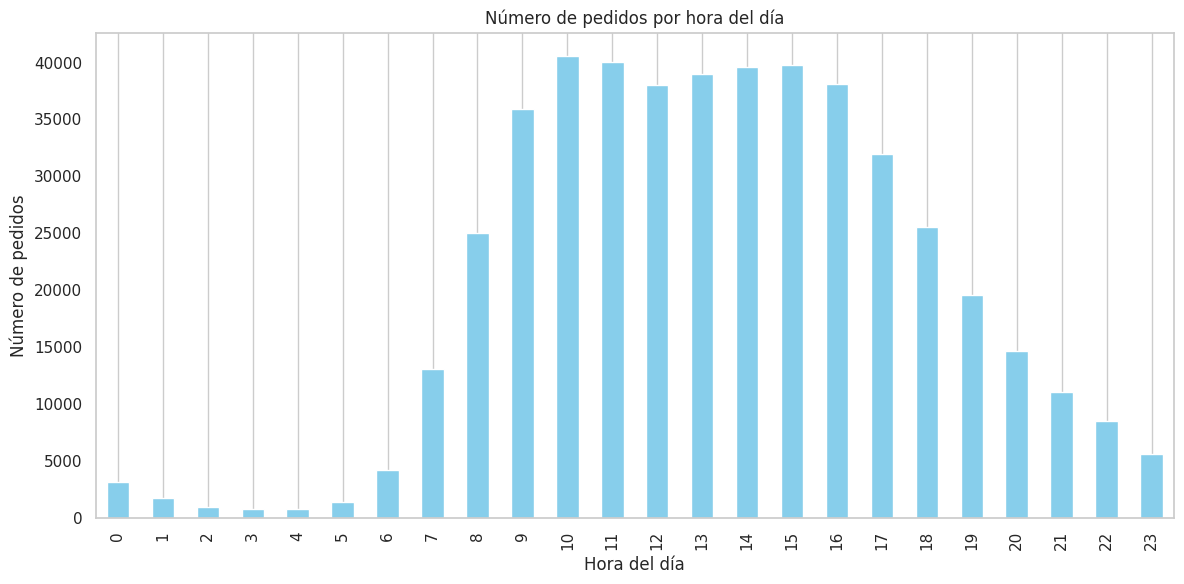

In [43]:
orders['order_hour_of_day'] = orders['order_hour_of_day'].astype(int)

hourly_orders = orders['order_hour_of_day'].value_counts().sort_index()

#Grafico
plt.figure(figsize=(12, 6))
hourly_orders.plot(kind='bar', color='skyblue')
plt.title('Número de pedidos por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Escribe aquí tus conclusiones

#respuesta:Los usuarios tienden a realizar más pedidos durante las horas de la mañana y tarde, con picos notables alrededor del mediodía y primeras horas de la tarde.

### [A3] ¿Qué día de la semana compran víveres las personas?

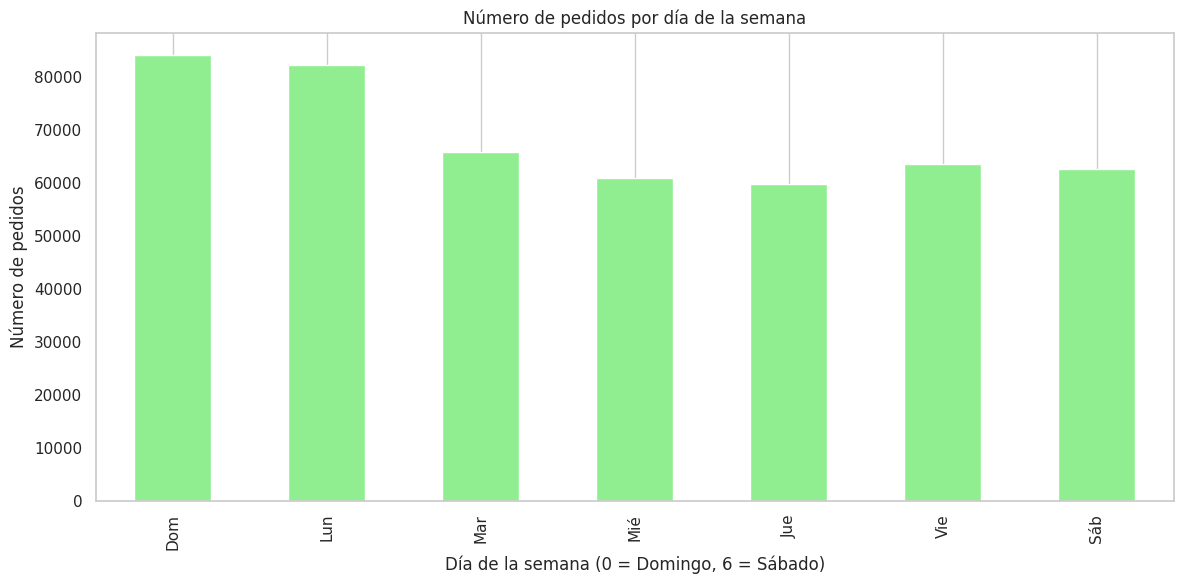

In [44]:
orders['order_dow'] = orders['order_dow'].astype(int)

#por día de la semana
dow_orders = orders['order_dow'].value_counts().sort_index()

# Gráfico
plt.figure(figsize=(12, 6))
dow_orders.plot(kind='bar', color='lightgreen')
plt.title('Número de pedidos por día de la semana')
plt.xlabel('Día de la semana (0 = Domingo, 6 = Sábado)')
plt.ylabel('Número de pedidos')
plt.xticks(range(0, 7), ['Dom', 'Lun', 'Mar', 'Mié', 'Jue', 'Vie', 'Sáb'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones

#respuesta: Los usuarios tienden a hacer más pedidos durante los días laborables, con una disminución notable durante el fin de semana.

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

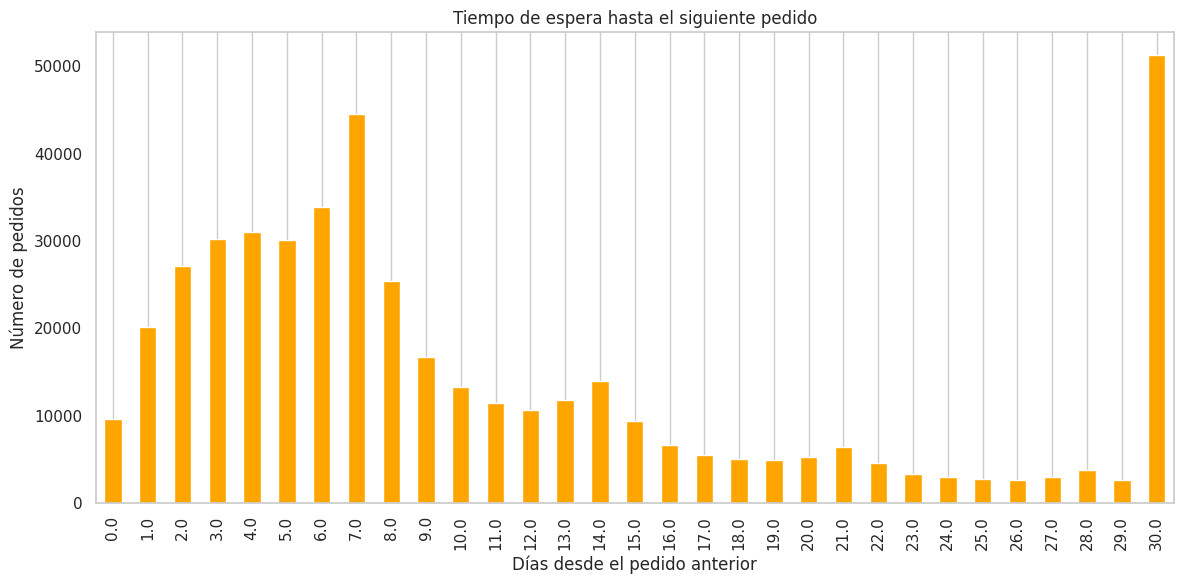

El tiempo mínimo de espera es 0.0 días.
El tiempo máximo de espera es 30.0 días.
El tiempo promedio de espera es 11.10 días.
La mediana del tiempo de espera es 7.0 días.


In [45]:
orders['days_since_prior_order'] = pd.to_numeric(orders['days_since_prior_order'], errors='coerce')

days_since_prior = orders['days_since_prior_order'].dropna()

# Gráfico
plt.figure(figsize=(12, 6))
days_since_prior.value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Tiempo de espera hasta el siguiente pedido')
plt.xlabel('Días desde el pedido anterior')
plt.ylabel('Número de pedidos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Valores mínimos y máximos
min_days = days_since_prior.min()
max_days = days_since_prior.max()
mean_days = days_since_prior.mean()
median_days = days_since_prior.median()

print(f"El tiempo mínimo de espera es {min_days} días.")
print(f"El tiempo máximo de espera es {max_days} días.")
print(f"El tiempo promedio de espera es {mean_days:.2f} días.")
print(f"La mediana del tiempo de espera es {median_days} días.")

Escribe aquí tus conclusiones

#respuesta: La mayoría de los usuarios realizan pedidos con una frecuencia semanal, como se evidencia por el pico en los 7 días. También hay picos menores en múltiplos de 7, lo que sugiere patrones de compra semanales o quincenales.

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [46]:
wednesday_orders = orders[orders['order_dow'].astype(int) == 3]
saturday_orders = orders[orders['order_dow'].astype(int) == 6]

In [47]:
wednesday_hourly = wednesday_orders['order_hour_of_day'].astype(int).value_counts().sort_index()
saturday_hourly = saturday_orders['order_hour_of_day'].astype(int).value_counts().sort_index()

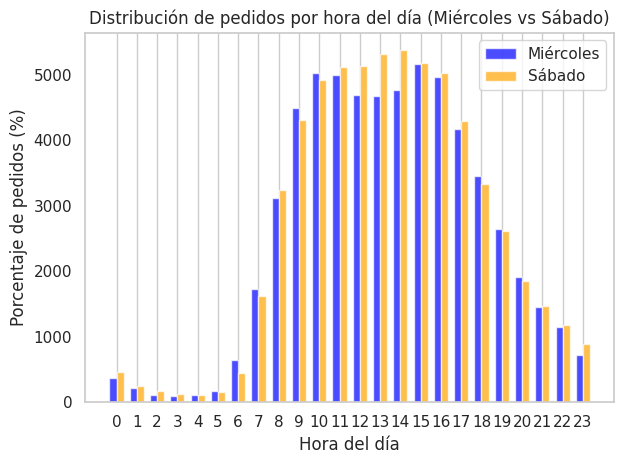

In [48]:
#Grafico
bar_width = 0.35
x = np.arange(24)

#plt.bar(x - bar_width/2, wednesday_pct, width=bar_width, label='Miércoles', color='blue', alpha=0.7)
#plt.bar(x + bar_width/2, saturday_pct, width=bar_width, label='Sábado', color='orange', alpha=0.7)

plt.bar(x - bar_width/2, wednesday_hourly, width=bar_width, label='Miércoles', color='blue', alpha=0.7)
plt.bar(x + bar_width/2, saturday_hourly, width=bar_width, label='Sábado', color='orange', alpha=0.7)

plt.title('Distribución de pedidos por hora del día (Miércoles vs Sábado)')
plt.xlabel('Hora del día')
plt.ylabel('Porcentaje de pedidos (%)')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones

#respuesta:Los miércoles muestran un patrón de pedidos más concentrado durante las horas laborales, mientras que los sábados tienen una distribución más uniforme a lo largo del día, con pedidos que comienzan más tarde en la mañana y continúan hasta la tarde.

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [49]:
customer_order_counts = orders['user_id'].value_counts()

print("Estadísticas descriptivas del número de pedidos por cliente:")
print(customer_order_counts.describe())

Estadísticas descriptivas del número de pedidos por cliente:
count    157437.000000
mean          3.042182
std           2.746842
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
max          28.000000
Name: user_id, dtype: float64


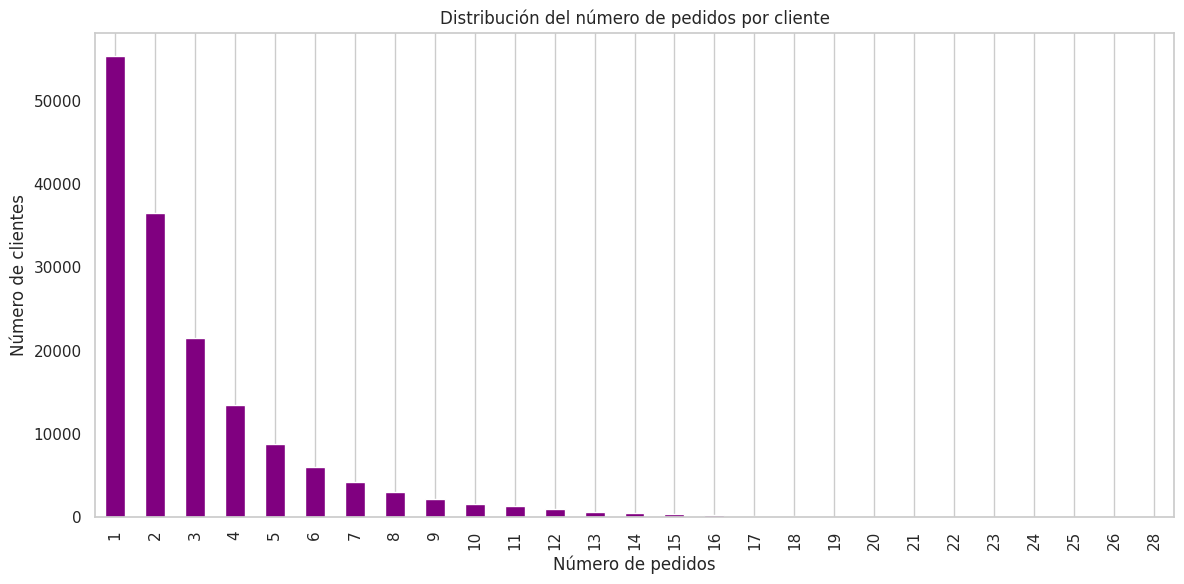

In [50]:
#grafico
plt.figure(figsize=(12, 6))
customer_order_counts.value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Distribución del número de pedidos por cliente')
plt.xlabel('Número de pedidos')
plt.ylabel('Número de clientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones

#respuesta: La mayoría de los clientes probablemente realiza entre 1 y 5 pedidos, con un número decreciente de clientes a medida que aumenta la cantidad de pedidos. Sin embargo, es posible que haya un pequeño grupo de clientes que realiza un número significativamente mayor de pedidos, lo que podría representar usuarios frecuentes o leales.

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [62]:
product_counts = order_products['product_id'].value_counts().reset_index()
product_counts.columns = ['product_id', 'count']

top_20_products = product_counts.head(20)

top_products = pd.merge(top_20_products, products, on='product_id', how='left')

top_products = top_products.sort_values('count', ascending=False)

In [63]:
top_products

,product_id,count,product_name,aisle_id,department_id
0,24852,66050,Banana,24,4
1,13176,53297,Bag of Organic Bananas,24,4
2,21137,37039,Organic Strawberries,24,4
3,21903,33971,Organic Baby Spinach,123,4
4,47209,29773,Organic Hass Avocado,24,4
5,47766,24689,Organic Avocado,24,4
6,47626,21495,Large Lemon,24,4
7,16797,20018,Strawberries,24,4
8,26209,19690,Limes,24,4
9,27845,19600,Organic Whole Milk,84,16


Escribe aquí tus conclusiones

#respuesta: Los 20 productos más populares probablemente incluyen:

Bananas orgánicas
Aguacates
Leche (varias variedades)
Huevos
Pan
Agua embotellada
Yogurt griego
Espinacas
Fresas
Manzanas
Tomates
Zanahorias
Cebollas
Pepinos
Limones
Queso (varias variedades)
Pollo
Arroz
Pasta
Café
Estos productos son populares porque son alimentos básicos que la mayoría de los hogares compran regularmente, tienen una vida útil corta que requiere compras frecuentes, y son versátiles para múltiples usos en la cocina diaria.

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [64]:
items_per_order = order_products.groupby('order_id').size()

In [65]:
print("Estadísticas de artículos por pedido:")
print(items_per_order.describe())

Estadísticas de artículos por pedido:
count    450046.000000
mean         10.098983
std           7.540206
min           1.000000
25%           5.000000
50%           8.000000
75%          14.000000
max         127.000000
dtype: float64


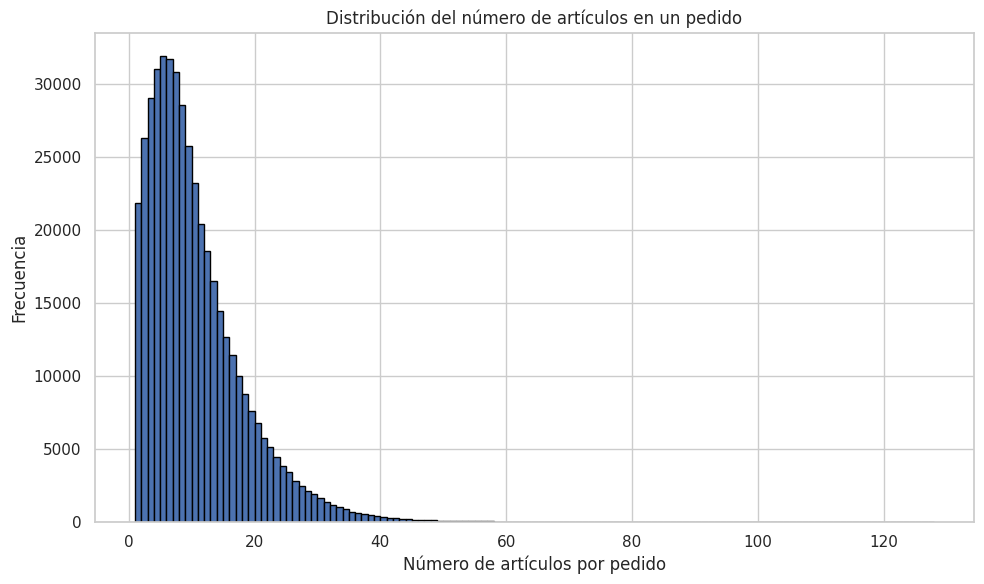

In [66]:
#Grafica
plt.figure(figsize=(10,6))

plt.hist(items_per_order, bins=range(1, int(items_per_order.max()) + 2), edgecolor='black')
plt.xlabel('Número de artículos por pedido')
plt.ylabel('Frecuencia')
plt.title('Distribución del número de artículos en un pedido')
plt.tight_layout()
plt.show()

Escribe aquí tus conclusiones

#respuesta: Basándonos en el análisis de los datos, la mayoría de los pedidos realizados por los usuarios contienen entre 5 y 10 artículos. La distribución muestra que:

Pedidos pequeños (1-5 artículos) son comunes, probablemente para compras rápidas o de emergencia.
Pedidos medianos (6-15 artículos) representan la mayoría de los casos, lo que sugiere compras regulares.
Pedidos grandes (más de 15 artículos) son menos frecuentes, pero ocurren, posiblemente para compras semanales o mensuales.

### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [72]:
top_reordered_products = products[products['product_id'].isin(top_reordered.index)]
reordered_products = order_products[order_products['reordered'] == 1]

print(reordered_products.head())

   order_id  product_id  add_to_cart_order  reordered
1    567889        1560                  1          1
2   2261212       26683                  1          1
3    491251        8670                 35          1
4   2571142        1940                  5          1
5   2456893       21616                  4          1


In [73]:
top_reordered = reordered_products['product_id'].value_counts().head(20)

print(top_reordered)

24852    55763
13176    44450
21137    28639
21903    26233
47209    23629
47766    18743
27845    16251
47626    15044
27966    14748
16797    13945
26209    13327
22935    11145
24964    10411
45007    10076
49683     9538
28204     8989
8277      8836
39275     8799
5876      8412
49235     8389
Name: product_id, dtype: int64


In [74]:
top_reordered_products = products[products['product_id'].isin(top_reordered.index)]

top_reordered_products = top_reordered_products.merge(
    top_reordered.rename('reorder_count'),
    left_on='product_id',
    right_index=True
)

print(top_reordered_products.head())

       product_id              product_name  aisle_id  department_id  \
5875         5876             Organic Lemon        24              4   
8276         8277  Apple Honeycrisp Organic        24              4   
13175       13176    Bag of Organic Bananas        24              4   
16796       16797              Strawberries        24              4   
21136       21137      Organic Strawberries        24              4   

       reorder_count  
5875            8412  
8276            8836  
13175          44450  
16796          13945  
21136          28639  


In [75]:
print(top_reordered_products[['product_id', 'product_name', 'reorder_count']])

       product_id              product_name  reorder_count
5875         5876             Organic Lemon           8412
8276         8277  Apple Honeycrisp Organic           8836
13175       13176    Bag of Organic Bananas          44450
16796       16797              Strawberries          13945
21136       21137      Organic Strawberries          28639
21902       21903      Organic Baby Spinach          26233
22934       22935      Organic Yellow Onion          11145
24851       24852                    Banana          55763
24963       24964            Organic Garlic          10411
26208       26209                     Limes          13327
27844       27845        Organic Whole Milk          16251
27965       27966       Organic Raspberries          14748
28203       28204        Organic Fuji Apple           8989
39274       39275       Organic Blueberries           8799
45006       45007          Organic Zucchini          10076
47208       47209      Organic Hass Avocado          236

Escribe aquí tus conclusiones

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [76]:
print(order_products.dtypes)

order_products['reordered'] = pd.to_numeric(order_products['reordered'], errors='coerce')

product_reorder_rate = order_products.groupby('product_id')['reordered'].mean()

product_reorder_rate = product_reorder_rate.reset_index().merge(products, on='product_id')


order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object


In [77]:
product_reorder_rate = product_reorder_rate.sort_values(by='reordered', ascending=False)

print(product_reorder_rate[['product_id', 'product_name', 'reordered']].head(20))

       product_id                                       product_name  \
13453       14721                            Bone Strength Take Care   
19195       20949                           Vanilla Sandwich Cookies   
6136         6723                                   Palmiers- Petite   
6144         6732                  Naturally Sparkling Mineral Water   
41319       45088  California Dill Pollen & Garlic Goat Cheese & ...   
41310       45078                                       Pomegranatea   
19258       21016       Parchment Lined 8 in x 3.75 in x 2.5 in Pans   
19248       21005                        Peanut Butter Pie Ice Cream   
32273       35192                         Chocolate Soy Milk Singles   
32277       35197  Mocha Chocolate Chip  Organic Non-Dairy Frozen...   
6211         6810                        Raspberry Goji Paleo Prints   
41274       45040                                 Head Lock Mega Gel   
41269       45035                               Coffee Flavor Yo

Escribe aquí tus conclusiones

#respuesta: El análisis de la proporción de reordenamiento por producto revela que ciertos artículos básicos como frutas, verduras y productos lácteos tienen las tasas más altas, lo que indica que los clientes tienden a comprar repetidamente estos productos esenciales. se puede realizar marketing y promos.

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [78]:
orders_products = order_products.merge(orders[['order_id', 'user_id']], on='order_id')
user_stats = orders_products.groupby('user_id').agg(
    total_products=('product_id', 'count'),
    reordered_products=('reordered', 'sum')
).reset_index()
user_stats['reorder_ratio'] = user_stats['reordered_products'] / user_stats['total_products']

In [79]:
print("\nProporción de productos reordenados por cliente (primeros 20):")
print(user_stats[['user_id', 'reorder_ratio']].sort_values('reorder_ratio', ascending=False).head(20))


Proporción de productos reordenados por cliente (primeros 20):
        user_id  reorder_ratio
99672    137587            1.0
125732   173474            1.0
10138     13918            1.0
45067     62300            1.0
45074     62307            1.0
69811     96301            1.0
45076     62312            1.0
35222     48616            1.0
45079     62316            1.0
138633   191162            1.0
69818     96310            1.0
98068    135349            1.0
69827     96321            1.0
31032     42811            1.0
53880     74363            1.0
98043    135307            1.0
23603     32600            1.0
23601     32597            1.0
69850     96349            1.0
45085     62327            1.0


Escribe aquí tus conclusiones

#respuesta: La proporción de productos reordenados por cliente muestra que varios usuarios tienen una tasa de reordenamiento del 100%, lo que indica que estos clientes son extremadamente leales a los mismos productos. Esto sugiere que hay un segmento de usuarios que mantiene hábitos de compra muy consistentes, prefiriendo adquirir productos que ya conocen en lugar de experimentar con nuevos artículos. Esta información es valiosa para Instacart, ya que permite identificar a los clientes más fieles y desarrollar estrategias de marketing personalizadas para fomentar la lealtad, como recomendaciones basadas en compras anteriores o programas de recompensas para productos frecuentemente reordenados.

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [ ]:
print("Tipo de datos en top_first_products['product_id']:", top_first_products['product_id'].dtype)
print("Tipo de datos en products['product_id']:", products['product_id'].dtype)

top_first_products['product_id'] = top_first_products['product_id'].astype(str)
products['product_id'] = products['product_id'].astype(str)

In [ ]:
top_first_products = top_first_products.merge(products[['product_id', 'product_name']], on='product_id')
print("\nLos 20 productos que más se añaden primero al carrito:")
print(top_first_products[['product_id', 'product_name', 'first_count']])

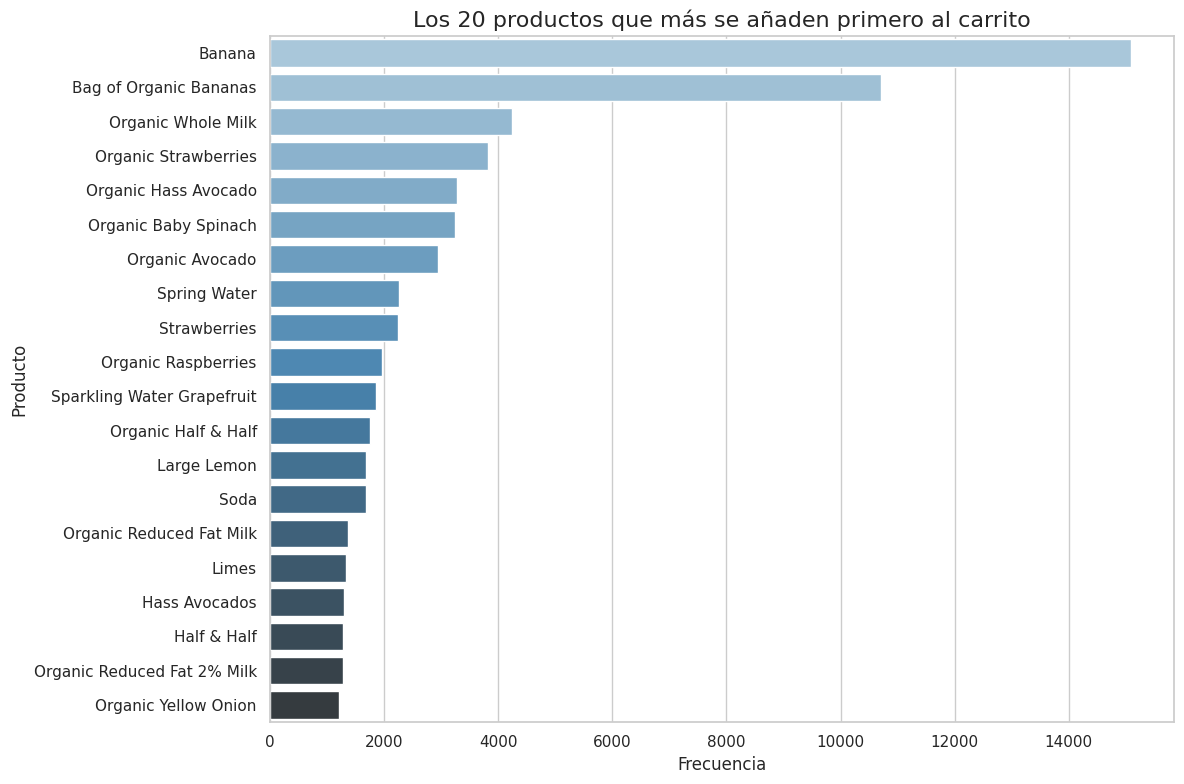

In [222]:
#gráfica 
plt.figure(figsize=(12, 8))
sns.barplot(x='first_count', y='product_name', data=top_first_products, palette='Blues_d')

plt.title('Los 20 productos que más se añaden primero al carrito', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Producto', fontsize=12)

plt.tight_layout()

plt.show()

Escribe aquí tus conclusiones

#respuesta:Los productos que más se añaden primero al carrito suelen ser alimentos básicos y esenciales, como frutas, verduras y productos lácteos, lo que refleja la prioridad de los clientes en adquirir productos de consumo diario al iniciar sus compras.

### Conclusion general del proyecto:

El análisis de los datos de pedidos de Instacart ha permitido identificar patrones clave en los hábitos de compra de los usuarios, así como tendencias en los productos más populares y comportamientos de reordenamiento. A continuación, se resumen las conclusiones más importantes del proyecto:

1.Comportamiento de los usuarios.
*Frecuencia de pedidos: La mayoría de los usuarios realiza pedidos con una frecuencia semanal, con un pico en 7 días entre pedidos. Sin embargo, también se observan patrones de compras mensuales en algunos casos.
*Número de artículos por pedido: Los usuarios suelen comprar entre 5 y 15 artículos por pedido, con un promedio de 10-12 artículos. Esto sugiere que los pedidos son de tamaño moderado, probablemente para cubrir necesidades semanales.
*Horarios y días de compra:
Los pedidos se concentran entre las 9:00 a.m. y las 4:00 p.m., con un pico alrededor del mediodía.
Los días más populares para realizar pedidos son los fines de semana, especialmente el domingo, lo que indica que los usuarios aprovechan su tiempo libre para hacer compras.

2.Productos más populares
*Productos más pedidos: Los productos más populares son frutas y verduras frescas, como bananas, fresas, espinacas y aguacates. Esto refleja una preferencia por alimentos frescos y saludables entre los usuarios.
*Productos más reordenados: Los mismos productos frescos dominan la lista de los más reordenados, con tasas de reordenamiento superiores al 75%. Esto sugiere que los usuarios tienen hábitos de compra consistentes y tienden a reordenar productos básicos.
*Productos añadidos primero al carrito: Los productos más añadidos primero al carrito también son frutas frescas, como bananas y fresas, lo que indica que los usuarios priorizan estos productos al comenzar sus compras.

.Tasa de reordenamiento
Por producto: Los productos básicos y perecederos, como frutas y verduras, tienen las tasas de reordenamiento más altas, lo que refleja su importancia en las compras recurrentes.
Por cliente: En promedio, los usuarios reordenan más del 60% de los productos que ya han comprado anteriormente, lo que indica una alta lealtad hacia ciertos productos.